In [1]:
import sys
sys.path.append('../model_analysis')
import pandas as pd 
import json
from model_utils import COLUMNS
from run_grid_search import load_json
import seaborn as sns 
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
IGNORE = ["svr", "ensamble2", "ensamble3", "knn"]

In [3]:
features = load_json("../model_analysis/selected_features.json")

# Listando atributos por modelo

In [5]:
for model in features.keys():
    print(f"- Model: {model}")
    for ft in features[model]:
        print(f"\t - {ft}")

- Model: linear_regression
	 - neutros_global_pct
- Model: ada_boost
	 - neutros
	 - positivos_individual_pct
	 - neutros_individual_pct
	 - negativos_individual_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day2
	 - day3
	 - likes
	 - retweets
	 - seguidores
	 - fica
	 - fora
- Model: random_forest
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora
- Model: lasso
	 - neutros
	 - negativos
	 - positivos_individual_pct
	 - neutros_individual_pct
	 - negativos_individual_pct
	 - positivos_global_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day1
	 - day2
	 - day3
	 - likes
	 - retweets
	 - seguidores
	 - fica
	 - fora
- Model: ridge
	 - positivos
	 - neutros
	 - positivos_individual_pct
	 - neutros_individual_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day1
	 - day2
	 - likes
	 - seguidores
	 - fora
- Model: elastic_net
	 - positivos_individual_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day1
	 - seguidores
	 - fora
- Model: sgd
	 - positi

# Distribuição de escolhas

In [6]:
features_df = pd.DataFrame(columns=["qty"], index=COLUMNS)
features_df["qty"] = 0

In [7]:
for feature in features_df.index:
    for model in features.keys():
        if model in IGNORE: continue
        if feature in features[model]:
            features_df.loc[feature] += 1

In [8]:
features_df = features_df[features_df["qty"] > 0].sort_values(by="qty", ascending=False)

In [9]:
features_df

,qty
neutros_global_pct,7
fora,6
seguidores,6
day2,5
negativos_global_pct,5
positivos_individual_pct,5
neutros_individual_pct,4
neutros,4
day1,4
likes,4


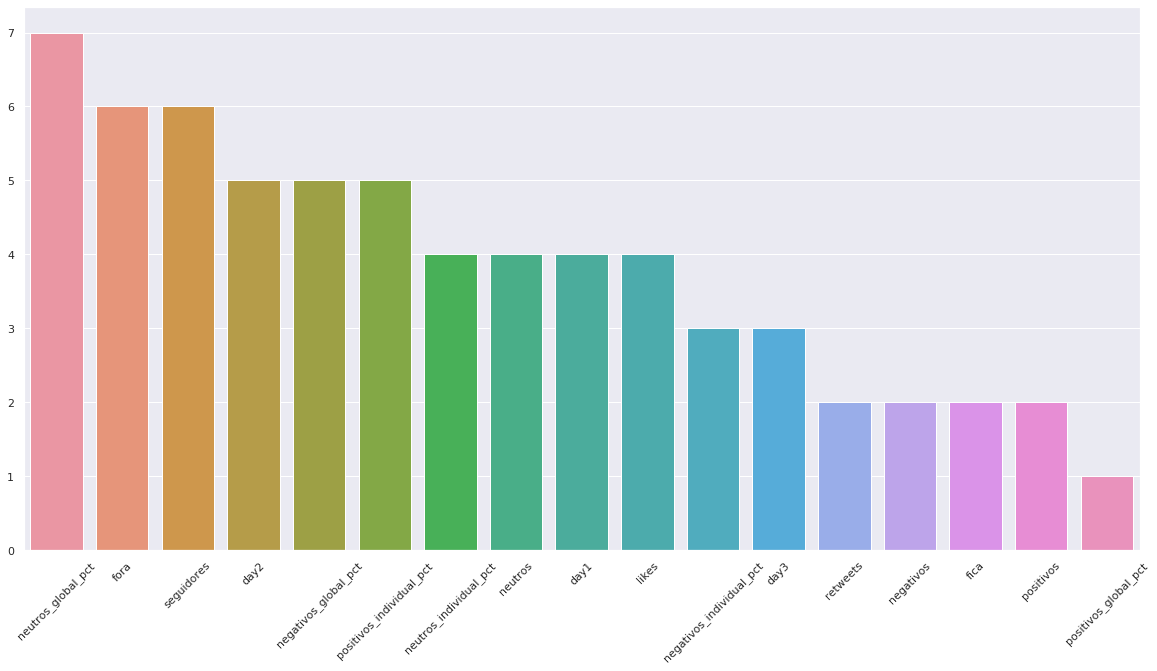

In [10]:
chart = sns.barplot(x=features_df.index, y=features_df["qty"].values)
for item in chart.get_xticklabels():
    item.set_rotation(45)